In [1]:
import numpy as np
import scipy
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, Locator, FixedLocator
import colorcet as cc
import astropy
import astropy.units as u
import astropy.constants as c
import anesthetic
from anesthetic import read_chains, make_1d_axes, make_2d_axes
import primpy
import primpy.bigbang as bb
import camb
import classy

In [2]:
np.__version__

'1.26.4'

In [3]:
scipy.__version__

'1.14.1'

In [4]:
pd.__version__

'2.2.2'

In [5]:
mpl.__version__

'3.9.2'

In [6]:
cc.__version__

'3.1.0'

In [7]:
astropy.__version__

'6.1.2'

In [8]:
anesthetic.__version__

'2.10.0'

In [9]:
primpy.__version__

'2.9.0'

In [10]:
camb.__version__

'1.5.4'

In [11]:
classy.__version__

'v3.2.3'

In [12]:
plt.style.use(['mybase', 'mysize_jcap', 'mytex'])
fw, fh = plt.rcParams['figure.figsize']
xtick_major_pad = plt.rcParams['xtick.major.pad']
axes_labelpad = plt.rcParams['axes.labelpad']
font_size = plt.rcParams['font.size']
majorsize = plt.rcParams['xtick.major.size']

In [13]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

&nbsp;

# Parameter groups

In [14]:
params_cosmo = ['omegabh2', 'omegach2', 'theta_MC_100', 'tau', 'logA', 'ns']
params_taprx = ['teq_kyr_approx', 'tstar_kyr_approx', 'tbdec_Myr_approx', 'treio_Myr_approx', 'tq_Gyr_approx']
params_times = ['teq_CAMB_kyr', 'tstar_CAMB_kyr', 'tbdec_CAMB_Myr', 'treio_CAMB_Myr', 'tq_CAMB_Gyr', 'age']
params_rdsft = ['zeq', 'zstar', 'z_bdec', 'zrei', 'z_q']
params_scale = ['a_eq', 'a_star', 'z_bdec', 'a_reio', 'a_q']
params_Tphot = ['T_photon_eq', 'T_photon_star', 'T_photon_bdec', 'T_photon_reio', 'T_photon_q']

&nbsp;

# Planck chain

In [15]:
!ls /home/lthergt/data/CobayaData/PR4/LCDM/PR3_lowlTT_PR4_LoLLiPoP-lowlE_HiLLiPoP-TTTEEE_lensing/MC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing/MCMC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing.yaml

/home/lthergt/data/CobayaData/PR4/LCDM/PR3_lowlTT_PR4_LoLLiPoP-lowlE_HiLLiPoP-TTTEEE_lensing/MC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing/MCMC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing.yaml


In [16]:
pr4 = read_chains("/home/lthergt/data/CobayaData/PR4/LCDM/PR3_lowlTT_PR4_LoLLiPoP-lowlE_HiLLiPoP-TTTEEE_lensing/MC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing/MCMC__LCDM__PR3_lowlTT_PR4_LoLLiPoP_lowlE_HiLLiPoP_TTTEEE_lensing")

In [17]:
pr4.columns.get_level_values(0)

Index(['omegabh2', 'omegach2', 'theta_MC_100', 'tau', 'logA', 'ns', 'A_planck',
       'cal100A', 'cal100B', 'cal143B', 'cal217A', 'cal217B', 'Aradio',
       'Adusty', 'AdustT', 'beta_dustT', 'Acib', 'beta_cib', 'Atsz', 'Aksz',
       'xi', 'AdustP', 'beta_dustP', 'H0', 'omega_de', 'omegam', 'omegamh2',
       'sigma8', 's8h5', 's8omegamp5', 's8omegamp25', 'S8', 'cosmomc_theta',
       'thetastar', 'zstar', 'rstar', 'zdrag', 'rdrag', 'thetaeq', 'zeq',
       'zrei', 'As', 'A', 'clamp', 'YHe', 'Y_p', 'DHBBN', 'age', 'beta_dusty',
       'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2',
       'chi2__planck_2018_lowl.TT', 'chi2__planck_2020_lollipop.lowlE',
       'chi2__planck_2020_hillipop.TTTEEE',
       'chi2__planckpr4lensing.PlanckPR4Lensing', 'logL', 'chain'],
      dtype='object')

### Compute `CAMB` values

In [18]:
pr4['z_q'] = (2 * pr4.omega_de / pr4.omegam)**(1/3) - 1
pr4.set_label('z_q', '$z_q$')
idx0 = pr4.index[0]
pars0 = camb.set_params(
    H0=pr4.H0[idx0], ombh2=pr4.omegabh2[idx0], omch2=pr4.omegach2[idx0], omk=0.0, tau=pr4.tau[idx0], As=pr4.As[idx0], ns=pr4.ns[idx0],
    num_massive_neutrinos=1, mnu=0.06, nnu=3.044,
    # YHe=pr4.YHe[idx0],
    bbn_predictor='PArthENoPE_880.2_standard.dat',
    halofit_version='mead',
    theta_H0_range=(40, 90),
    lmax=2500, lens_potential_accuracy=1,
    AccuracyBoost=2,
    want_zstar=True, want_zdrag=True,
    Evolve_baryon_cs=True,
)
# results0 = camb.get_background(pars0)
results0 = camb.get_results(pars0)
results0.physical_time(pr4.loc[idx0, ['zeq', 'zstar', 'zdrag', 'zrei', 'z_q']])

array([5.28950958e-05, 3.74133039e-04, 3.91942114e-04, 6.44342176e-01,
       7.50979242e+00])

### Load pre-calculated `CAMB` values

In [19]:
t_array = np.loadtxt(pr4.root + "_physical_times_mreq_star_drag_bdec_reio_deac.txt")
t_array.shape

(143089, 6)

In [20]:
z_array = np.loadtxt(pr4.root + "_redshifts_mreq_star_drag_bdec_reio_deac.txt")
z_array.shape

(143089, 6)

### Add `CAMB` values to derived parameters

In [21]:
pr4['z_bdec'] = np.where(z_array[:, 3] == 0, np.nan, z_array[:, 3])
pr4['z_q']    = np.where(z_array[:, 5] == 0, np.nan, z_array[:, 5])
pr4.set_label('z_bdec', '$z_T$')
pr4.set_label('z_q', '$z_q$')

In [22]:
pr4['teq_CAMB_kyr']   = np.where(t_array[:, 0] == 0, np.nan, t_array[:, 0] * 1e6)  # convert Gyr to kyr
pr4['tstar_CAMB_kyr'] = np.where(t_array[:, 1] == 0, np.nan, t_array[:, 1] * 1e6)  # convert Gyr to kyr
pr4['tdrag_CAMB_kyr'] = np.where(t_array[:, 2] == 0, np.nan, t_array[:, 2] * 1e6)  # convert Gyr to kyr
pr4['tbdec_CAMB_Myr'] = np.where(t_array[:, 3] == 0, np.nan, t_array[:, 3] * 1e3)  # convert Gyr to Myr
pr4['treio_CAMB_Myr'] = np.where(t_array[:, 4] == 0, np.nan, t_array[:, 4] * 1e3)  # convert Gyr to Myr
pr4['tq_CAMB_Gyr']    = np.where(t_array[:, 5] == 0, np.nan, t_array[:, 5])        # keep in Gyr
pr4.set_label('teq_CAMB_kyr', '$t_\\mathrm{eq}~/~\\mathrm{kyr}$')
pr4.set_label('tstar_CAMB_kyr', '$t_\\ast~/~\\mathrm{kyr}$')
pr4.set_label('tdrag_CAMB_kyr', '$t_\\mathrm{drag}~/~\\mathrm{kyr}$')
pr4.set_label('tbdec_CAMB_Myr', '$t_T~/~\\mathrm{Myr}$')
pr4.set_label('treio_CAMB_Myr', '$t_\\mathrm{reio}~/~\\mathrm{Myr}$')
pr4.set_label('tq_CAMB_Gyr', '$t_q~/~\\mathrm{Gyr}$')

In [23]:
pr4['teq_CAMB_s']   = np.where(t_array[:, 0] == 0, np.nan, t_array[:, 0] * u.Gyr.to(u.s))  # convert to s
pr4['tstar_CAMB_s'] = np.where(t_array[:, 1] == 0, np.nan, t_array[:, 1] * u.Gyr.to(u.s))  # convert to s
pr4['tdrag_CAMB_s'] = np.where(t_array[:, 2] == 0, np.nan, t_array[:, 2] * u.Gyr.to(u.s))  # convert to s
pr4['tbdec_CAMB_s'] = np.where(t_array[:, 3] == 0, np.nan, t_array[:, 3] * u.Gyr.to(u.s))  # convert to s
pr4['treio_CAMB_s'] = np.where(t_array[:, 4] == 0, np.nan, t_array[:, 4] * u.Gyr.to(u.s))  # convert to s
pr4['tq_CAMB_s']    = np.where(t_array[:, 5] == 0, np.nan, t_array[:, 5] * u.Gyr.to(u.s))  # convert to s
pr4.set_label('teq_CAMB_s', '$t_\\mathrm{eq}~/~\\mathrm{s}$')
pr4.set_label('tstar_CAMB_s', '$t_\\ast~/~\\mathrm{s}$')
pr4.set_label('tdrag_CAMB_s', '$t_\\mathrm{drag}~/~\\mathrm{s}$')
pr4.set_label('tbdec_CAMB_s', '$t_T~/~\\mathrm{s}$')
pr4.set_label('treio_CAMB_s', '$t_\\mathrm{reio}~/~\\mathrm{s}$')
pr4.set_label('tq_CAMB_s', '$t_q~/~\\mathrm{s}$')

### Burn in

In [24]:
pr4 = pr4.remove_burn_in(0.1)

### Convergence check

In [25]:
pr4.Gelman_Rubin(params=params_cosmo, per_param=True)

(0.001041753424507706,
                                   R-1
 params       labels                  
 omegabh2     $\Omega_\ma...  0.000357
 omegach2     $\Omega_\ma...  0.000604
 theta_MC_100 $100\,\thet...  0.000048
 tau          $\tau_\math...  0.000074
 logA         $\ln(10^{10...  0.000142
 ns           $n_\mathrm{s}$  0.000121)

In [26]:
pr4.Gelman_Rubin(params=params_rdsft, per_param=True)

(0.0009243533641864018,
                             R-1
 params labels                  
 zeq    $z_\mathrm{...  0.000570
 zstar  $z_\ast$        0.000550
 z_bdec $z_T$           0.000323
 zrei   $z_\mathrm{...  0.000088
 z_q    $z_q$           0.000556)

In [27]:
pr4.Gelman_Rubin(params=params_times, per_param=True)

(0.001005257127429228,
                                     R-1
 params         labels                  
 teq_CAMB_kyr   $t_\mathrm{...  0.000573
 tstar_CAMB_kyr $t_\ast~/~\...  0.000602
 tbdec_CAMB_Myr $t_T~/~\mat...  0.000058
 treio_CAMB_Myr $t_\mathrm{...  0.000117
 tq_CAMB_Gyr    $t_q~/~\mat...  0.000537
 age            $\mathrm{Ag...  0.000286)

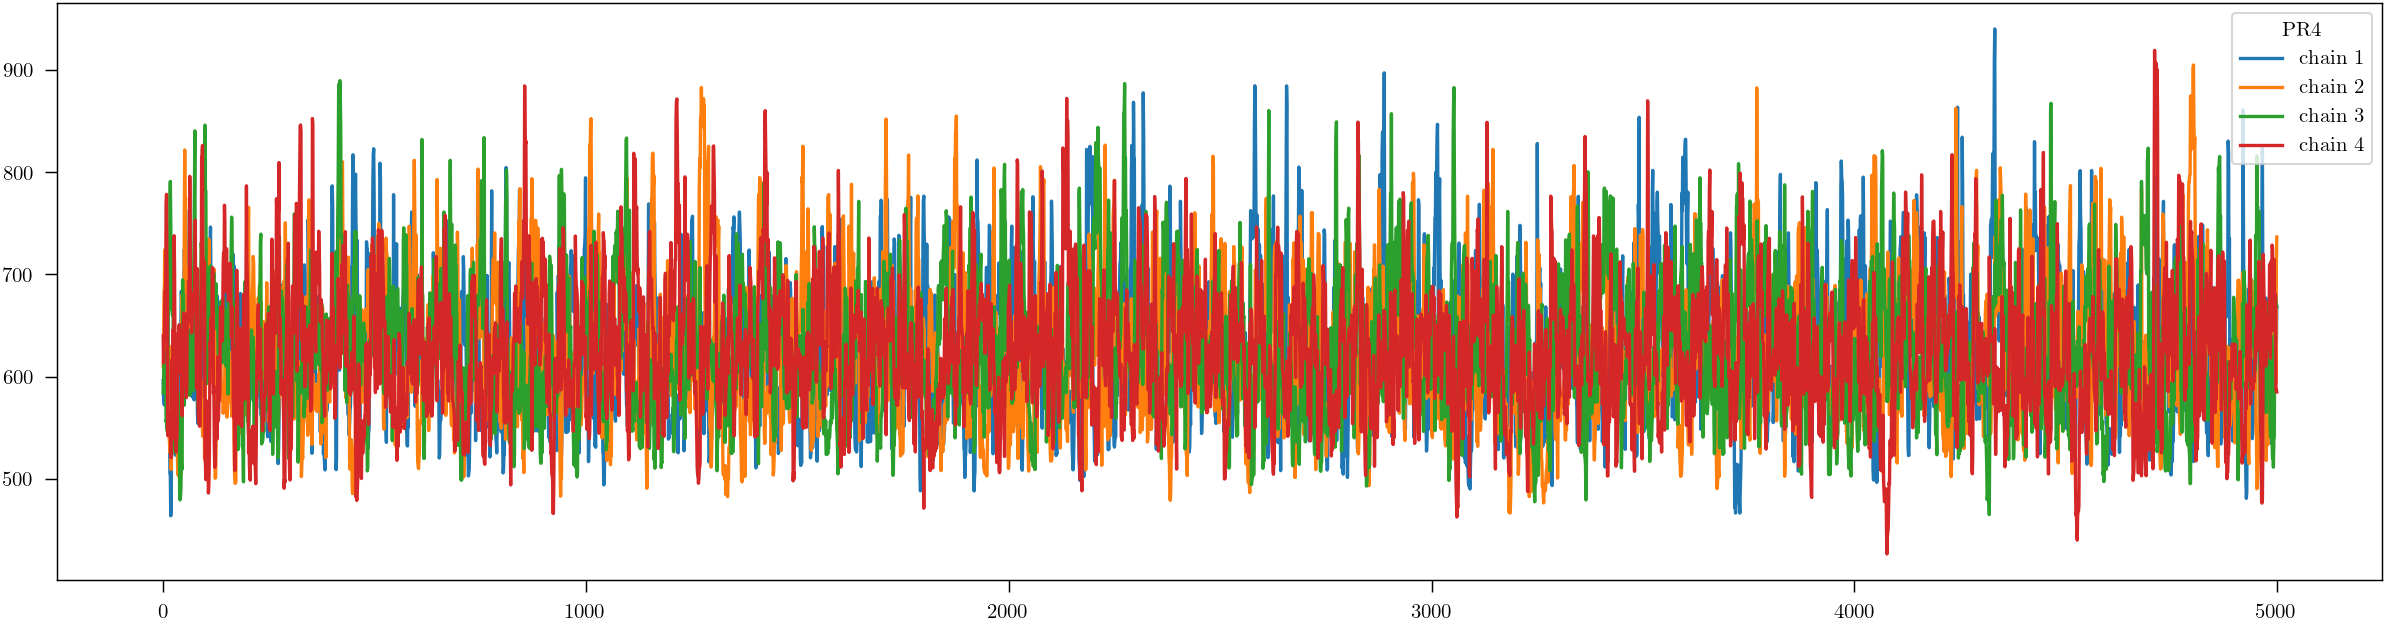

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))
pr4_chains = pr4.groupby('chain')
pr4_chains.get_group(1).treio_CAMB_Myr.reset_index(drop=True).iloc[:5000].plot(label="chain 1")
pr4_chains.get_group(2).treio_CAMB_Myr.reset_index(drop=True).iloc[:5000].plot(label="chain 2")
pr4_chains.get_group(3).treio_CAMB_Myr.reset_index(drop=True).iloc[:5000].plot(label="chain 3")
pr4_chains.get_group(4).treio_CAMB_Myr.reset_index(drop=True).iloc[:5000].plot(label="chain 4")
ax.legend(title="PR4");

&nbsp;

# Approximations

## $\Omega_\mathrm{r}$

In [29]:
pr4['omegar'] = bb.get_Omega_r0(h=pr4.H0/100)
pr4.set_label('omegar', '$\\Omega_\\mathrm{r}$')

&nbsp;

## Matter-radiation equality

The time at matter-radiation equality is explicitly given by:

$
\begin{align}
H_0 t_{\rm eq} &= {4\over3} \left(1-{1\over\sqrt{2}}\right) {a_{\rm eq}^2\over\sqrt{\Omega_{\rm r}}} \\
    t_{\rm eq} &= {4\over3H_0\sqrt{\Omega_{\rm r}}(1+z_{\rm eq})^2} \left(1-{1\over\sqrt{2}}\right)
\end{align}
$

where $H_0$ is the Hubble parameter today, $a_{\rm eq}$ is the scale factor at which matter and radiation (including the neutrino contribution) densities are equal and $\Omega_{\rm r}$ is the radiation density parameter today (from $T_0$).

The question is what $t_{\rm eq}$ is for the 6-parameter LCDM model using the Planck-only (TTTEEE+lensing) likelihood.

In [30]:
pr4['teq_s_approx'] = 4/3 * (1-1/np.sqrt(2)) / bb.get_H0(h=pr4.H0/100, units='SI') / (np.sqrt(pr4.omegar) * (1+pr4.zeq)**2)  # in seconds
pr4['teq_kyr_approx'] = pr4['teq_s_approx'] * u.s.to(u.kyr)  # in kilo years
pr4.set_label('teq_s_approx', '$t_\\mathrm{eq}~/~\\mathrm{s}$')
pr4.set_label('teq_kyr_approx', '$t_\\mathrm{eq}~/~\\mathrm{kyr}$')

&nbsp;

## Last scattering

A second quantity is the age at $t_*$, the reombination epoch.  This is a little more complicated, but still has an analytic expression:

$
\begin{align}
H_0 t &= {4 a_{\rm eq}^2\over3   \sqrt{\Omega_{\rm r}}} \left[ 1- \left(1-{a\over 2a_{\rm eq}}\right) \left(1+{a\over a_{\rm eq}}\right)^{1/2} \right] \\
    t &= {4 \over3H_0\sqrt{\Omega_{\rm r}} (1+z_{\rm eq})^2} \left[ 1- \left(1-{(1+z_{\rm eq})\over 2(1+z)}\right) \left(1+{(1+z_{\rm eq})\over (1+z)}\right)^{1/2} \right]
\end{align}
$

where you need to use a_rm and you put in $a=a_*$.

In [31]:
pr4['tstar_s_approx'] = 4/3 / bb.get_H0(h=pr4.H0/100, units='SI') / np.sqrt(pr4.omegar) / (1+pr4.zeq)**2 * (1 - (1 - (1+pr4.zeq)/2/(1+pr4.zstar)) * np.sqrt(1 + (1+pr4.zeq)/(1+pr4.zstar)))  # in seconds
pr4['tstar_kyr_approx'] = pr4['tstar_s_approx'] * u.s.to(u.kyr)  # in kilo years
pr4.set_label('tstar_s_approx', '$t_\\ast~/~\\mathrm{s}$')
pr4.set_label('tstar_kyr_approx', '$t_\\ast~/~\\mathrm{kyr}$')

&nbsp;

## Baryon-temperature decoupling

In [32]:
pr4['tbdec_s_approx'] = 4/3 / bb.get_H0(h=pr4.H0/100, units='SI') / np.sqrt(pr4.omegar) / (1+pr4.zeq)**2 * (1 - (1 - (1+pr4.zeq)/2/(1+pr4.z_bdec)) * np.sqrt(1 + (1+pr4.zeq)/(1+pr4.z_bdec)))  # in seconds
pr4['tbdec_Myr_approx'] = pr4['tbdec_s_approx'] * u.s.to(u.Myr)  # in kilo years
pr4.set_label('tbdec_s_approx', '$t_\\ast~/~\\mathrm{s}$')
pr4.set_label('tbdec_Myr_approx', '$t_\\ast~/~\\mathrm{Myr}$')

&nbsp;

## Reionisation

In [33]:
pr4['treio_s_approx'] = 2 / (3 * bb.get_H0(h=pr4.H0/100, units='SI') * np.sqrt(pr4.omega_de)) * np.arcsinh(np.sqrt(pr4.omega_de / ((1-pr4.omega_de) * (1+pr4.zrei)**3)))  # in seconds
pr4['treio_Myr_approx'] = pr4['treio_s_approx'] * u.s.to(u.Myr)  # in giga years
pr4.set_label('treio_s_approx', '$t_q~/~\\mathrm{s}$')
pr4.set_label('treio_Myr_approx', '$t_q~/~\\mathrm{Myr}$')

&nbsp;

## Deceleration to acceleration

Thirdly, there's the time at the epoch when the Universe went from deceleration to acceleration:

$
t_q = {2 \sinh^{-1}\left(\sqrt{1/2}\right) \over 3H_0\sqrt{\Omega_\Lambda}}
$

In [34]:
pr4['tq_s_approx'] = 2/3 * np.arcsinh(np.sqrt(1/2)) / bb.get_H0(h=pr4.H0/100, units='SI') / np.sqrt(pr4.omega_de)  # in seconds
pr4['tq_Gyr_approx'] = pr4['tq_s_approx'] * u.s.to(u.Gyr)  # in giga years
pr4.set_label('tq_s_approx', '$t_q~/~\\mathrm{s}$')
pr4.set_label('tq_Gyr_approx', '$t_q~/~\\mathrm{Gyr}$')

&nbsp;

# filling in the missing redshifts and scale factors

In [35]:
pr4['age_s'] = pr4['age'] * u.Gyr.to(u.s)
pr4.set_label('age', '$t_0~/~\\mathrm{Gyr}$')
pr4.set_label('age_s', '$t_0~/~\\mathrm{s}$')

In [36]:
pr4['a_eq'] = 1/(1+pr4['zeq'])
pr4['a_star'] = 1/(1+pr4['zstar'])
pr4['a_bdec'] = 1/(1+pr4['z_bdec'])
pr4['a_reio'] = 1/(1+pr4['zrei'])
pr4['a_q'] = 1/(1+pr4['z_q'])
pr4.set_label('a_eq',   '$a_\\mathrm{eq}$')
pr4.set_label('a_star', '$a_\\ast$')
pr4.set_label('a_bdec', '$a_T$')
pr4.set_label('a_reio', '$a_\\mathrm{reio}$')
pr4.set_label('a_q',    '$a_q$')

# Temperature

In [37]:
pr4['T_photon_eq'] = pars0.TCMB * (pr4.zeq+1)
pr4['T_photon_star'] = pars0.TCMB * (pr4.zstar+1)
pr4['T_photon_bdec'] = pars0.TCMB * (pr4.z_bdec+1)
pr4['T_photon_reio'] = pars0.TCMB * (pr4.zrei+1)
pr4['T_photon_q'] = pars0.TCMB * (pr4.z_q+1)
pr4.set_label('T_photon_eq',   '$T^{(\\gamma)}_\\mathrm{eq}~/~\\mathrm{K}$')
pr4.set_label('T_photon_star', '$T^{(\\gamma)}_\\ast~/~\\mathrm{K}$')
pr4.set_label('T_photon_bdec', '$T^{(\\gamma)}_T~/~\\mathrm{K}$')
pr4.set_label('T_photon_reio', '$T^{(\\gamma)}_\\mathrm{reio}~/~\\mathrm{K}$')
pr4.set_label('T_photon_q',    '$T^{(\\gamma)}_q~/~\\mathrm{K}$')

In [38]:
pr4['T_photon_eq_eV'] = pr4['T_photon_eq'] * (u.Kelvin * c.k_B).to(u.eV)
pr4['T_photon_star_eV'] = pr4['T_photon_star'] * (u.Kelvin * c.k_B).to(u.eV)
pr4['T_photon_bdec_meV'] = pr4['T_photon_bdec'] * (u.Kelvin * c.k_B).to(u.meV)
pr4['T_photon_reio_meV'] = pr4['T_photon_reio'] * (u.Kelvin * c.k_B).to(u.meV)
pr4['T_photon_q_meV'] = pr4['T_photon_q'] * (u.Kelvin * c.k_B).to(u.meV)
pr4.set_label('T_photon_eq_eV',   '$T^{(\\gamma)}_\\mathrm{eq}~/~\\mathrm{eV}$')
pr4.set_label('T_photon_star_eV', '$T^{(\\gamma)}_\\ast~/~\\mathrm{eV}$')
pr4.set_label('T_photon_bdec_meV', '$T^{(\\gamma)}_T~/~\\mathrm{meV}$')
pr4.set_label('T_photon_reio_meV', '$T^{(\\gamma)}_\\mathrm{reio}~/~\\mathrm{meV}$')
pr4.set_label('T_photon_q_meV',    '$T^{(\\gamma)}_q~/~\\mathrm{meV}$')

In [39]:
pars0.TCMB * u.Kelvin

<Quantity 2.7255 K>

In [40]:
pars0.TCMB * (u.Kelvin * c.k_B).to(u.meV)

<Quantity 0.23486542 meV>

&nbsp;

# Comparison between `CAMB` and approximations

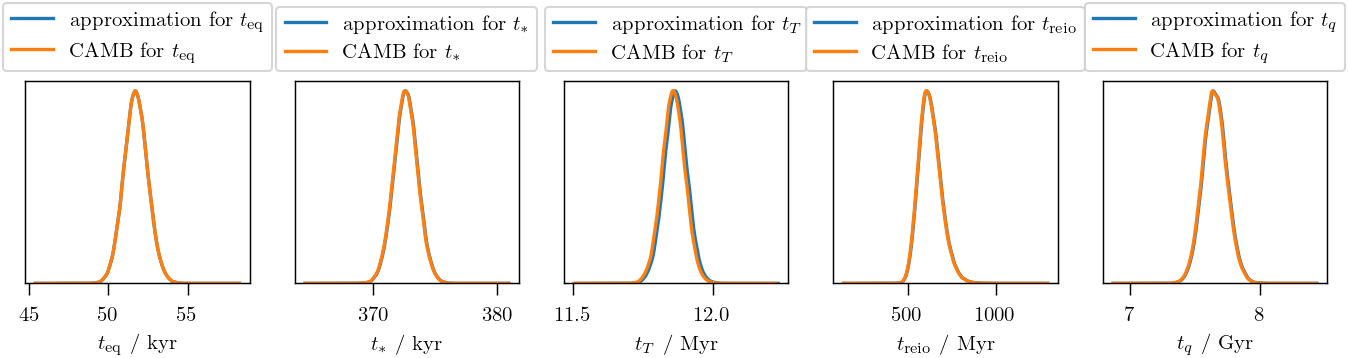

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(2*fw, 0.5*fh))
pr4.teq_kyr_approx.plot.kde(ax=axes[0], label="approximation for $t_\\mathrm{eq}$")
pr4.teq_CAMB_kyr.plot.kde(ax=axes[0], label="CAMB for $t_\\mathrm{eq}$")
pr4.tstar_kyr_approx.plot.kde(ax=axes[1], label="approximation for $t_\\ast$")
pr4.tstar_CAMB_kyr.plot.kde(ax=axes[1], label="CAMB for $t_\\ast$")
pr4.tbdec_Myr_approx.plot.kde(ax=axes[2], label="approximation for $t_T$")
pr4.tbdec_CAMB_Myr.plot.kde(ax=axes[2], label="CAMB for $t_T$")
pr4.treio_Myr_approx.plot.kde(ax=axes[3], label="approximation for $t_\\mathrm{reio}$")
pr4.treio_CAMB_Myr.plot.kde(ax=axes[3], label="CAMB for $t_\\mathrm{reio}$")
pr4.tq_Gyr_approx.plot.kde(ax=axes[4], label="approximation for $t_q$")
pr4.tq_CAMB_Gyr.plot.kde(ax=axes[4], label="CAMB for $t_q$")
axes[0].set_xlabel(pr4.get_label('teq_CAMB_kyr'))
axes[1].set_xlabel(pr4.get_label('tstar_CAMB_kyr'))
axes[2].set_xlabel(pr4.get_label('tbdec_CAMB_Myr'))
axes[3].set_xlabel(pr4.get_label('treio_CAMB_Myr'))
axes[4].set_xlabel(pr4.get_label('tq_CAMB_Gyr'))
for ax in axes:
    ax.legend(bbox_to_anchor=(0.5, 1), loc='lower center');


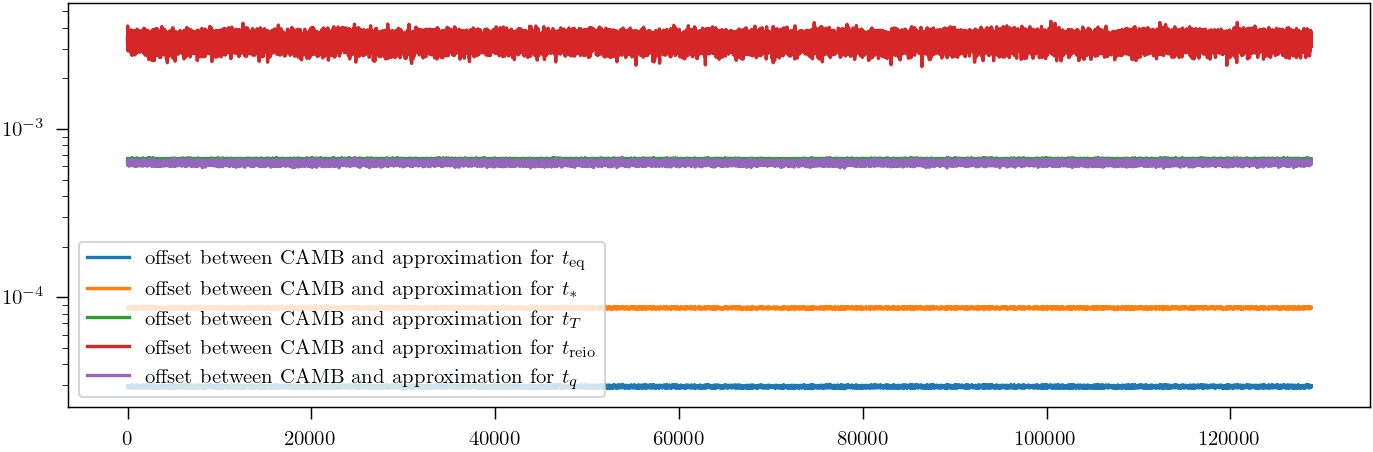

In [42]:
fig, ax = plt.subplots(figsize=(2*fw, fh))
ax.semilogy(pr4.teq_kyr_approx.to_numpy()/pr4.teq_CAMB_kyr.to_numpy()-1, label="offset between CAMB and approximation for $t_\\mathrm{eq}$")
ax.semilogy(pr4.tstar_kyr_approx.to_numpy()/pr4.tstar_CAMB_kyr.to_numpy()-1, label="offset between CAMB and approximation for $t_\\ast$")
ax.semilogy(pr4.tbdec_Myr_approx.to_numpy()/pr4.tbdec_CAMB_Myr.to_numpy()-1, label="offset between CAMB and approximation for $t_T$")
ax.semilogy(pr4.treio_Myr_approx.to_numpy()/pr4.treio_CAMB_Myr.to_numpy()-1, label="offset between CAMB and approximation for $t_\\mathrm{reio}$")
ax.semilogy(pr4.tq_Gyr_approx.to_numpy()/pr4.tq_CAMB_Gyr.to_numpy()-1, label="offset between CAMB and approximation for $t_q$")
# ax.set_ylim(-0.5e-5, 9.5e-5)
ax.legend();

In [43]:
print(f"  t_eq = {pr4.teq_CAMB_kyr.mean():g}, \t rel = {(pr4.teq_kyr_approx/pr4.teq_CAMB_kyr-1).max():.3e}, \t abs = {(pr4.teq_kyr_approx-pr4.teq_CAMB_kyr).max():.5f} kyr")
print(f"t_star = {pr4.tstar_CAMB_kyr.mean():g}, \t rel = {(pr4.tstar_kyr_approx/pr4.tstar_CAMB_kyr-1).max():.3e}, \t abs = {(pr4.tstar_kyr_approx-pr4.tstar_CAMB_kyr).max():.4f} kyr")
print(f"   t_T = {pr4.tbdec_CAMB_Myr.mean():g}, \t rel = {(pr4.tbdec_Myr_approx/pr4.tbdec_CAMB_Myr-1).max():.3e}, \t abs = {(pr4.tbdec_Myr_approx-pr4.tbdec_CAMB_Myr).max():.5f} Myr")
print(f"t_reio = {pr4.treio_CAMB_Myr.mean():g}, \t rel = {(pr4.treio_Myr_approx/pr4.treio_CAMB_Myr-1).max():.3e}, \t abs = {(pr4.treio_Myr_approx-pr4.treio_CAMB_Myr).max():.2f} Myr")
print(f"   t_q = {pr4.tq_CAMB_Gyr.mean():g}, \t rel = {(pr4.tq_Gyr_approx/pr4.tq_CAMB_Gyr-1).max():.3e}, \t abs = {(pr4.tq_Gyr_approx-pr4.tq_CAMB_Gyr).max():.5f} Gyr")


  t_eq = 51.7399, 	 rel = 3.040e-05, 	 abs = 0.00167 kyr
t_star = 372.606, 	 rel = 8.803e-05, 	 abs = 0.0332 kyr
   t_T = 11.8593, 	 rel = 6.756e-04, 	 abs = 0.00812 Myr
t_reio = 627.512, 	 rel = 4.358e-03, 	 abs = 2.39 Myr
   t_q = 7.65152, 	 rel = 6.747e-04, 	 abs = 0.00491 Gyr


# Plotting setup

In [44]:
mreq = pr4.copy()
star = pr4.copy()
drag = pr4.copy()
bdec = pr4.copy()
reio = pr4.copy()
deac = pr4.copy()
ageu = pr4.copy()

In [45]:
mreq['t'] = pr4['teq_CAMB_kyr'] * 1e3
mreq['z'] = pr4['zeq']
mreq['a'] = 1/(1+pr4['zeq'])
mreq.set_label('t', '$t$')
mreq.set_label('z', '$z$')
mreq.set_label('a', '$a$')

In [46]:
star['t'] = pr4['tstar_CAMB_kyr'] * 1e3
star['z'] = pr4['zstar']
star['a'] = 1/(1+pr4['zstar'])
star.set_label('t', '$t$')
star.set_label('z', '$z$')
star.set_label('a', '$a$')

In [47]:
drag['t'] = pr4['tdrag_CAMB_kyr'] * 1e3
drag['z'] = pr4['zdrag']
drag['a'] = 1/(1+pr4['zdrag'])
drag.set_label('t', '$t$')
drag.set_label('z', '$z$')
drag.set_label('a', '$a$')

In [48]:
bdec['t'] = pr4['tbdec_CAMB_Myr'] * 1e6
bdec['z'] = pr4['z_bdec']
bdec['a'] = 1/(1+pr4['z_bdec'])
bdec.set_label('t', '$t$')
bdec.set_label('z', '$z$')
bdec.set_label('a', '$a$')

In [49]:
reio['t'] = pr4['treio_CAMB_Myr'] * 1e6
reio['z'] = pr4['zrei']
reio['a'] = 1/(1+pr4['zrei'])
reio.set_label('t', '$t$')
reio.set_label('z', '$z$')
reio.set_label('a', '$a$')

In [50]:
deac['t'] = pr4['tq_Gyr_approx'] * 1e9
deac['z'] = pr4['z_q']
deac['a'] = 1/(1+pr4['z_q'])
deac.set_label('t', '$t$')
deac.set_label('z', '$z$')
deac.set_label('a', '$a$')

In [51]:
ageu['t'] = pr4['age'] * 1e9
ageu.set_label('t', '$t$')

&nbsp;

# Plots

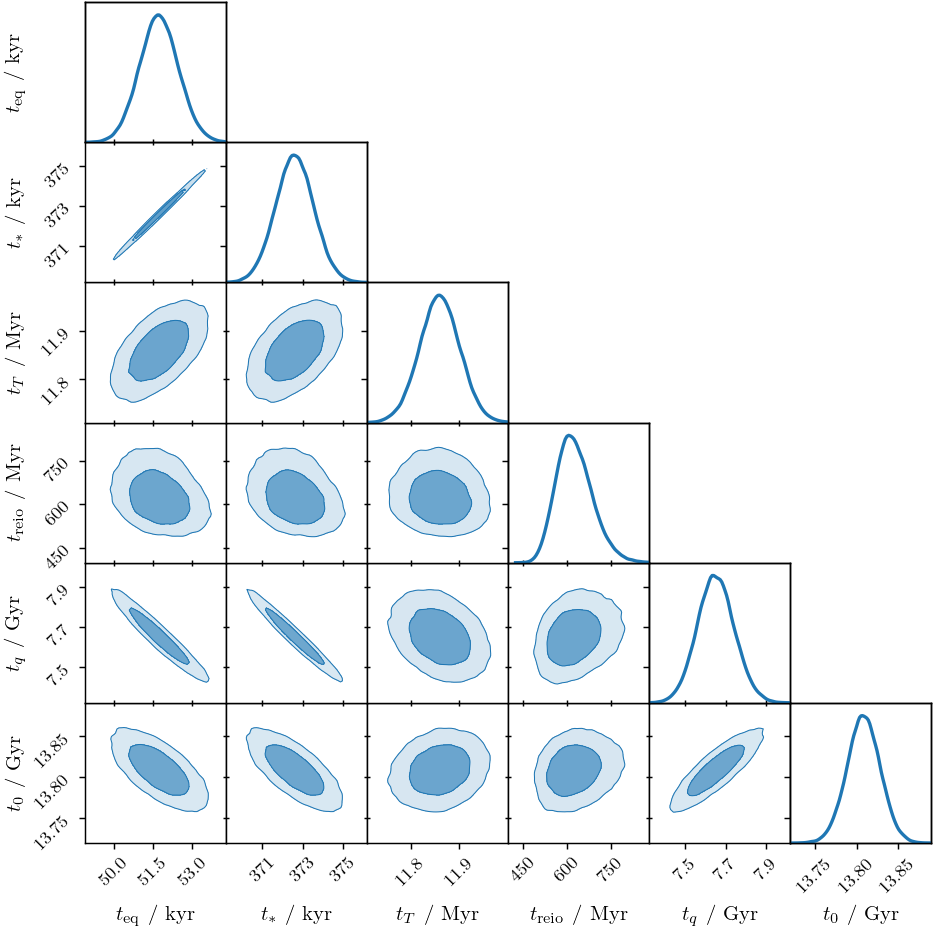

In [52]:
# 3min
fig, axes = make_2d_axes(params_times, figsize=(1.3*fw, 1.3*fw), upper=False)
# pr4.compress(ncompress='equal').plot_2d(axes, ncompress=500, lower_kwargs=dict(nplot_2d=100));
pr4.plot_2d(axes, ncompress=False, lower_kwargs=dict(nplot_2d=5000));
for ax in axes.to_numpy().flatten():
    if ax is not None:
        ax.minorticks_off()
        ax.tick_params(length=majorsize/2, pad=xtick_major_pad/2)
axes['teq_CAMB_kyr']['teq_CAMB_kyr'].set_xlim(48.9, 54.3)
axes['teq_CAMB_kyr']['teq_CAMB_kyr'].set_xticks([50, 51.5, 53])
axes['tstar_CAMB_kyr']['tstar_CAMB_kyr'].set_xlim(369.2, 376.2)
axes['tstar_CAMB_kyr']['tstar_CAMB_kyr'].set_xticks([371, 373, 375])
axes['tstar_CAMB_kyr']['tstar_CAMB_kyr'].set_yticks([371, 373, 375])
axes['tbdec_CAMB_Myr']['tbdec_CAMB_Myr'].set_xlim(11.71, 12.00)
axes['tbdec_CAMB_Myr']['tbdec_CAMB_Myr'].set_xticks([11.8, 11.9])
axes['tbdec_CAMB_Myr']['tbdec_CAMB_Myr'].set_yticks([11.8, 11.9])
axes['treio_CAMB_Myr']['treio_CAMB_Myr'].set_xlim(400, 880)
axes['treio_CAMB_Myr']['treio_CAMB_Myr'].set_xticks([450, 600, 750])
axes['treio_CAMB_Myr']['treio_CAMB_Myr'].set_yticks([450, 600, 750])
axes['tq_CAMB_Gyr']['tq_CAMB_Gyr'].set_xlim(7.32, 8.02)
axes['tq_CAMB_Gyr']['tq_CAMB_Gyr'].set_xticks([7.5, 7.7, 7.9])
axes['tq_CAMB_Gyr']['tq_CAMB_Gyr'].set_yticks([7.5, 7.7, 7.9])
axes['age']['age'].set_xlim(13.72, 13.89)
axes['age']['age'].set_xticks([13.75, 13.8, 13.85])
axes['age']['age'].set_yticks([13.75, 13.8, 13.85])
fig.savefig("planck_times_2d.pdf")

In [53]:
# needed for axis conversions

def year2second(x):
    return x * 365.25 * 24 * 3600

def second2year(x):
    return x / 365.25 / 24 / 3600

def K2eV(T):
    return (c.k_B * T * u.K).to(u.eV).value

def eV2K(E):
    return (E * u.eV / c.k_B).to(u.K).value

mean_pars = camb.set_params(
    H0=pr4.H0.mean(), ombh2=pr4.omegabh2.mean(), omch2=pr4.omegach2.mean(), omk=0.0, tau=pr4.tau.mean(), As=pr4.As.mean(), ns=pr4.ns.mean(),
    num_massive_neutrinos=1, mnu=0.06, nnu=3.044,
    bbn_predictor='PArthENoPE_880.2_standard.dat',
    halofit_version='mead',
    theta_H0_range=(40, 90),
    lmax=2500, lens_potential_accuracy=1,
    AccuracyBoost=2,
    want_zstar=True, want_zdrag=True,
    Evolve_baryon_cs=True,
)
mean_results = camb.get_background(mean_pars)
zplus1_to_time = lambda zplus1: mean_results.physical_time(z=zplus1-1) * 1e9
zplus1 = np.logspace(-1, 4, 5*200+1)
time_to_zplus1 = interp1d(zplus1_to_time(zplus1), zplus1)

In [54]:
# Temperature axis setup

a_past = np.logspace(-4, 0, 401)
a_future = np.logspace(0, 1, 101)[1:]
a = np.concatenate((a_past, a_future))
t = zplus1_to_time(1/a)
T_photon = mean_pars.TCMB * (1/a)
T_baryon = np.concatenate((
    mean_results.get_background_redshift_evolution(z=1/a_past-1,  vars=['T_b'])['T_b'],
    mean_results.get_background_redshift_evolution(z=np.zeros(1), vars=['T_b'])['T_b'] * (1/a_future**2),
))

In [55]:
mreq.color = cc.cm.rainbow(0.00)
star.color = cc.cm.rainbow(0.19)
bdec.color = cc.cm.rainbow(0.30)
reio.color = cc.cm.rainbow(0.63)
deac.color = cc.cm.rainbow(0.80)
ageu.color = cc.cm.rainbow(1.00)

/tmp/ipykernel_560369/1960919329.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mreq.color = cc.cm.rainbow(0.00)
/tmp/ipykernel_560369/1960919329.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  star.color = cc.cm.rainbow(0.19)
/tmp/ipykernel_560369/1960919329.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bdec.color = cc.cm.rainbow(0.30)
/tmp/ipykernel_560369/1960919329.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  reio.color = cc.cm.rainbow(0.63)
/tmp/ipykernel_560369/1960919329.py:5: UserWarning: 

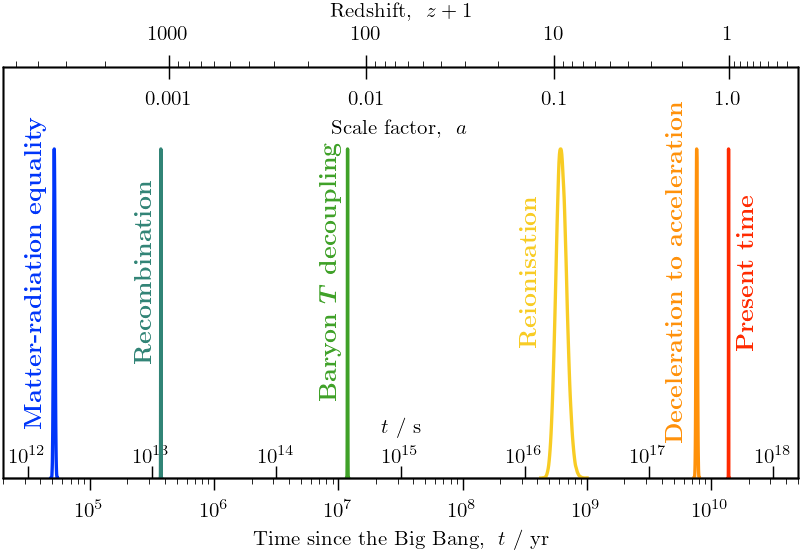

In [56]:
params = ['t']
fig, axes = make_1d_axes(params, figsize=(fw, fh), ncol=1, logx=['t'])

axy = axes['t']
mreq.plot_1d(axes, q=0, c=mreq.color)
star.plot_1d(axes, q=0, c=star.color)
bdec.plot_1d(axes, q=0, c=bdec.color)
reio.plot_1d(axes, q=0, c=reio.color)
deac.plot_1d(axes, q=0, c=deac.color)
ageu.plot_1d(axes, q=0, c=ageu.color)
# drag.plot_1d(axes, q=0, lw=1, c='k')

margin = 0.05
axy.set_ylim(0, 1.25)
axy.set_xlim(2e4, 5e10)
axy.tick_params(axis='x', which='both', direction='out')
axy.set_xlabel("Time since the Big Bang,~~$t~/~\\mathrm{yr}$")
axs = axy.secondary_xaxis('bottom', functions=(year2second, second2year))
axs.tick_params(axis='x', which='both', direction='in', pad=-xtick_major_pad)
axs.minorticks_off()
axs.set_xticks(np.logspace(12, 18, 6+1))
axs.set_xticklabels(axs.get_xticklabels(), va='bottom')
axs.set_xlabel("$t~/~\\mathrm{s}$", labelpad=-(xtick_major_pad+axes_labelpad+font_size), va='bottom')

axz = axy.twiny()
axa = axy.twiny()
axz.set_xscale('log')
axa.set_xscale('log')
axz.set_xlim((axy.get_xlim()))
axa.set_xlim((axy.get_xlim()))
major = np.logspace(0, 4, 4+1, dtype=int)
minorz = np.concatenate((
    np.linspace(1e-1, 1e0, 10)[:-1],
    np.linspace(1e0, 1e1, 10)[:-1],
    np.linspace(1e1, 1e2, 10)[:-1],
    np.linspace(1e2, 1e3, 10)[:-1],
    np.linspace(1e3, 1e4, 10),
))
minora = np.concatenate((
    np.linspace(1e-4, 1e-3, 10)[:-1],
    np.linspace(1e-3, 1e-2, 10)[:-1],
    np.linspace(1e-2, 1e-1, 10)[:-1],
    np.linspace(1e-1, 1e-0, 10)[:-1],
    np.linspace(1e-0, 1e+1, 10),
))

axz.xaxis.set_major_locator(FixedLocator(locs=zplus1_to_time(major)))
axa.xaxis.set_major_locator(FixedLocator(locs=zplus1_to_time(major)))
axz.xaxis.set_minor_locator(FixedLocator(locs=zplus1_to_time(minorz)))
axa.xaxis.set_minor_locator(FixedLocator(locs=zplus1_to_time(1/minora)))
axz.set_xticklabels(major, minor=False)
axa.set_xticklabels(1/major, minor=False)
axz.set_xticklabels([], minor=True);
axa.set_xticklabels([], minor=True);
axa.tick_params(axis='x', which='both', direction='in', pad=-(xtick_major_pad+majorsize))
axa.set_xticklabels(axa.get_xticklabels(), va='top')
axa.minorticks_off()
axz.set_xlabel("Redshift,~~$z+1$")
axa.set_xlabel("Scale factor,~~$a$", labelpad=-(xtick_major_pad+axes_labelpad+font_size+majorsize), va='top')

axy.text(mreq.t.min()- 6*mreq.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=mreq.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.0), s="\\textbf{Matter-radiation equality}")#, $t_\\mathrm{eq}$")
axy.text(star.t.min()-30*star.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=star.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.0), s="\\textbf{Recombination}")#, $t_\\ast$")
axy.text(bdec.t.min()-30*bdec.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=bdec.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.9), s=r"\textbf{Baryon $\bm{T}$ decoupling}")
axy.text(reio.t.min()+ 0*reio.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=reio.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.9), s="\\textbf{Reionisation}")#, $t_\\mathrm{reio}$")
axy.text(deac.t.min()-10*deac.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=deac.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.9), s="\\textbf{Deceleration to acceleration}")#, $t_q$")
axy.text(ageu.t.max()+90*ageu.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='left',  va='center', c=ageu.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.0), s="\\textbf{Present time}")#, $t_0$")

fig.savefig("planck_times.pdf")

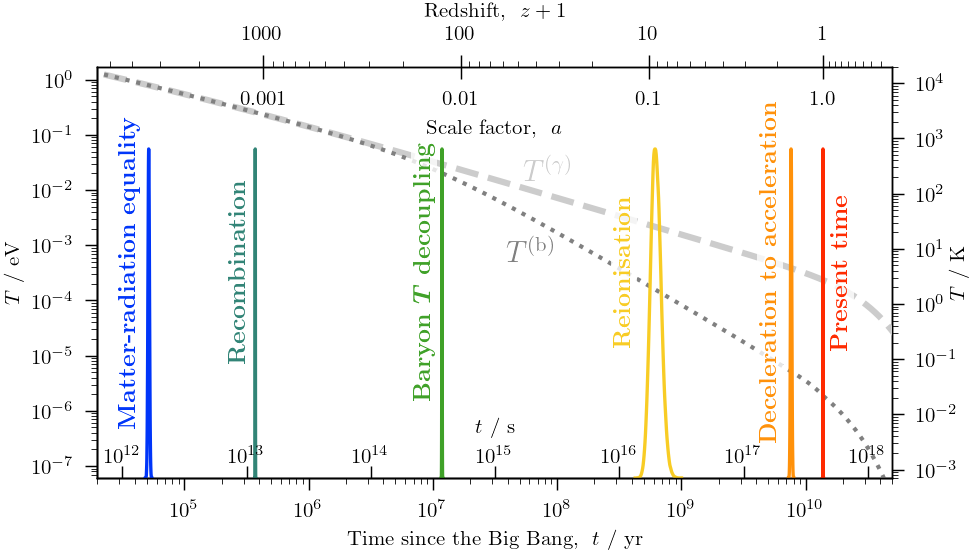

In [57]:
params = ['t']
fig, axes = make_1d_axes(params, figsize=(fw, fh), ncol=1, logx=['t'])
axy = axes['t']

# Temperature block
axT = axy.twinx()
axT.loglog(t, T_photon, c='0.8', ls='--', lw=3)
axT.loglog(t, T_baryon, c='0.5', ls=':',  lw=2)
axT.set_ylim(7e-4, 2e4)
axT.set_ylabel("$T~/~\\mathrm{K}$", labelpad=xtick_major_pad, va='bottom')
axV = axT.secondary_yaxis('left', functions=(K2eV, eV2K))
axV.tick_params(axis='y', which='both', direction='out')
axV.set_ylabel("$T~/~\\mathrm{eV}$")
axT.text(t[t.size*7//15], T_photon[t.size*7//15]*1.1, ha='left',  va='bottom', c='0.8', fontsize='x-large', s="$T^{(\\gamma)}$")
axT.text(t[t.size*5//10], T_baryon[t.size*5//10]*0.7, ha='right', va='top',    c='0.5', fontsize='x-large', s="$T^\\mathrm{(b)}$")

# posterior block
mreq.plot_1d(axes, q=0, c=mreq.color)
star.plot_1d(axes, q=0, c=star.color)
bdec.plot_1d(axes, q=0, c=bdec.color)
reio.plot_1d(axes, q=0, c=reio.color)
deac.plot_1d(axes, q=0, c=deac.color)
ageu.plot_1d(axes, q=0, c=ageu.color)
# drag.plot_1d(axes, q=0, lw=1, c='k')
margin = 0.05
axy.set_ylim(0, 1.25)
axy.set_xlim(2e4, 5e10)
axy.tick_params(axis='x', which='both', direction='out')
axy.set_xlabel("Time since the Big Bang,~~$t~/~\\mathrm{yr}$")
axs = axy.secondary_xaxis('bottom', functions=(year2second, second2year))
axs.tick_params(axis='x', which='both', direction='in', pad=-xtick_major_pad)
axs.minorticks_off()
axs.set_xticks(np.logspace(12, 18, 6+1))
axs.set_xticklabels(axs.get_xticklabels(), va='bottom')
axs.set_xlabel("$t~/~\\mathrm{s}$", labelpad=-(xtick_major_pad+axes_labelpad+font_size), va='bottom')

axz = axy.twiny()
axa = axy.twiny()
axz.set_xscale('log')
axa.set_xscale('log')
axz.set_xlim((axy.get_xlim()))
axa.set_xlim((axy.get_xlim()))
major = np.logspace(0, 4, 4+1, dtype=int)
minorz = np.concatenate((
    np.linspace(1e-1, 1e0, 10)[:-1],
    np.linspace(1e0, 1e1, 10)[:-1],
    np.linspace(1e1, 1e2, 10)[:-1],
    np.linspace(1e2, 1e3, 10)[:-1],
    np.linspace(1e3, 1e4, 10),
))
minora = np.concatenate((
    np.linspace(1e-4, 1e-3, 10)[:-1],
    np.linspace(1e-3, 1e-2, 10)[:-1],
    np.linspace(1e-2, 1e-1, 10)[:-1],
    np.linspace(1e-1, 1e-0, 10)[:-1],
    np.linspace(1e-0, 1e+1, 10),
))
axz.xaxis.set_major_locator(FixedLocator(locs=zplus1_to_time(major)))
axa.xaxis.set_major_locator(FixedLocator(locs=zplus1_to_time(major)))
axz.xaxis.set_minor_locator(FixedLocator(locs=zplus1_to_time(minorz)))
axa.xaxis.set_minor_locator(FixedLocator(locs=zplus1_to_time(1/minora)))
axz.set_xticklabels(major, minor=False)
axa.set_xticklabels(1/major, minor=False)
axz.set_xticklabels([], minor=True);
axa.set_xticklabels([], minor=True);
axa.tick_params(axis='x', which='both', direction='in', pad=-(xtick_major_pad+majorsize))
axa.set_xticklabels(axa.get_xticklabels(), va='top')
axa.minorticks_off()
axz.set_xlabel("Redshift,~~$z+1$")
axa.set_xlabel("Scale factor,~~$a$", labelpad=-(xtick_major_pad+axes_labelpad+font_size+majorsize), va='top')

axy.text(mreq.t.min()- 6*mreq.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=mreq.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.0), s=r"\textbf{Matter-radiation equality}")#, $t_\\mathrm{eq}$")
axy.text(star.t.min()-30*star.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=star.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.0), s=r"\textbf{Recombination}")#, $t_\\ast$")
axy.text(bdec.t.min()-30*bdec.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=bdec.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.8), s=r"\textbf{Baryon $\bm{T}$ decoupling}")
axy.text(reio.t.min()+ 0*reio.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=reio.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.8), s=r"\textbf{Reionisation}")#, $t_\\mathrm{reio}$")
axy.text(deac.t.min()-10*deac.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='right', va='center', c=deac.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.8), s=r"\textbf{Deceleration to acceleration}")#, $t_q$")
axy.text(ageu.t.max()+90*ageu.t.std(), axy.get_ylim()[-1]*0.5, rotation=90, ha='left',  va='center', c=ageu.color, fontsize='large', bbox=dict(fc='w', ec='None', pad=1, alpha=0.8), s=r"\textbf{Present time}")#, $t_0$")

axT.set_zorder(1)
axV.set_zorder(3)
axy.set_zorder(2)
axs.set_zorder(2)
axT.set_frame_on(False)
axy.set_frame_on(False)

fig.savefig("planck_times.pdf")

&nbsp;

# Tables

In [58]:
params = [
    'teq_CAMB_kyr',
    'teq_CAMB_s',
    'tstar_CAMB_kyr',
    'tstar_CAMB_s',
    'tbdec_CAMB_Myr',
    'tbdec_CAMB_s',
    'treio_CAMB_Myr',
    'treio_CAMB_s',
    'tq_Gyr_approx',
    'tq_s_approx',
    'age',
    'age_s',
    'zeq',
    'zstar',
    'z_bdec',
    'zrei',
    'z_q',
    'a_eq',
    'a_star',
    'a_bdec',
    'a_reio',
    'a_q',
    'T_photon_eq',
    'T_photon_eq_eV',
    'T_photon_star',
    'T_photon_star_eV',
    'T_photon_bdec',
    'T_photon_bdec_meV',
    'T_photon_reio',
    'T_photon_reio_meV',
    'T_photon_q',
    'T_photon_q_meV',
]

### Particle Physics Booklet

S. Navas et al. (Particle Data Group), Phys. Rev. D 110, 030001 (2024)

DOI: https://doi.org/10.1103/PhysRevD.110.030001

#### 5.3. Rounding: 

While the results shown in the Particle Listings are usually exactly those published by the experiments, the numbers that appear in the Summary Tables (means, averages and limits) are subject to a set of rounding rules.

**The basic rule states that if the three highest order digits of the error lie between 100 and 354, we round to two significant digits. If they lie between 355 and 949, we round to one significant digit. Finally, if they lie between 950 and 999, we round up to 1000 and keep two significant digits. In all cases, the central value is given with a precision that matches that of the error. So, for example, the result (coming from an average) 0.827 ± 0.119 would appear as 0.83 ± 0.12, while 0.827 ± 0.367 would turn into 0.8 ± 0.4.**

In cases where there are asymmetric errors, if these errors differ by less than 10 percent of the average of the two errors, the average is instead used as a symmetric error in the displayed result and the rounding is determined by this average. Otherwise, the narrower of the two asymmetric errors is used to determine the rounding on both.

Rounding of this form is also performed on the value of limits that come from calculations (but not on limits that are directly taken from a single source).

Finally, we should point out that in several instances, when a group of results come from a single fit to a set of data, we have chosen to keep two significant digits for all the results. This happens, for instance, for several properties of the W and Z bosons and the τ lepton.

In [59]:
def round_to_1or2_significant_digits(value, error):
    """Round value and error to either 1 or 2 significant digits.
    
    This scheme follows the one described in section 5.3 on Rounding in
    S. Navas et al. (Particle Data Group), Phys. Rev. D 110, 030001 (2024).
    DOI: https://doi.org/10.1103/PhysRevD.110.030001
    """
    first_3_error_digits = np.floor(error*10**(-int(np.floor(np.log10(np.abs(error)))) + 2)).astype(int)
    if 100 <= first_3_error_digits <= 354:
        num_sig_digits = 2
        round_to_digit = -int(np.floor(np.log10(np.abs(error)))) + 1
    elif 355 <= first_3_error_digits <= 949:
        num_sig_digits = 1
        round_to_digit = -int(np.floor(np.log10(np.abs(error)))) + 0
    elif 950 <= first_3_error_digits <= 999:
        num_sig_digits = 2
        round_to_digit = -int(np.floor(np.log10(np.abs(error)))) + 0
    value_rounded = round(value, round_to_digit)
    error_rounded = round(error, round_to_digit)
    return value_rounded, error_rounded, round_to_digit, num_sig_digits


In [60]:
def get_significant_digits_and_exponent(value, error, exponent_min=-2, exponent_max=3):
    value_rounded, error_rounded, round_to_digit, num_sig_digits = round_to_1or2_significant_digits(value=value, error=error)
    if value_rounded == 0:
        # special zero case
        value_rounded = abs(value_rounded)  # get rid of minus sign if `-0`
        exponent_err = np.floor(np.log10(error_rounded)).astype(int)
        if exponent_min <= exponent_err <= exponent_max:
            if round_to_digit > 0:
                return f"{value_rounded:.{round_to_digit}f}", f"{error_rounded:.{round_to_digit}f}", 0
            else:
                return f"{int(value_rounded):d}", f"{int(error_rounded):d}", 0
        else:
            base_err = error_rounded / 10.0**exponent_err
            return f"{value_rounded:.{exponent_err+round_to_digit}f}", f"{base_err:.{exponent_err+round_to_digit}f}", exponent_err
    else:
        exponent_val = np.floor(np.log10(abs(value_rounded))).astype(int)
        if exponent_min <= exponent_val <= exponent_max:
            # no scientific notation
            if round_to_digit > 0:
                return f"{value_rounded:.{round_to_digit}f}", f"{error_rounded:.{round_to_digit}f}", 0
            else:
                return f"{int(value_rounded):d}", f"{int(error_rounded):d}", 0
        else:
            base_val = value_rounded / 10.0**exponent_val
            base_err = error_rounded / 10.0**exponent_val
            # allow for scientific notation by splitting off the exponent
            return f"{base_val:.{exponent_val+round_to_digit}f}", f"{base_err:.{exponent_val+round_to_digit}f}", exponent_val
    

In [61]:
print(round_to_1or2_significant_digits(value=0.827, error=0.0973))
print(round_to_1or2_significant_digits(value=0.827, error=0.119))
print(round_to_1or2_significant_digits(value=0.827, error=0.367))


(0.83, 0.1, 2, 2)
(0.83, 0.12, 2, 2)
(0.8, 0.4, 1, 1)


In [62]:
print(get_significant_digits_and_exponent(value=0.827, error=0.0973))
print(get_significant_digits_and_exponent(value=0.827, error=0.119))
print(get_significant_digits_and_exponent(value=0.827, error=0.367))


('0.83', '0.10', 0)
('0.83', '0.12', 0)
('0.8', '0.4', 0)


In [63]:
def test_print_significant_digits():
    assert get_significant_digits_and_exponent(value=0.827, error=0.0973) == ('0.83', '0.10', 0)
    assert get_significant_digits_and_exponent(value=0.827, error=0.119) == ('0.83', '0.12', 0)
    assert get_significant_digits_and_exponent(value=0.827, error=0.367) == ('0.8', '0.4', 0)

    assert get_significant_digits_and_exponent(value=0.08271, error=0.000973) == ('0.0827', '0.0010', 0)
    assert get_significant_digits_and_exponent(value=0.08271, error=0.00119) == ('0.0827', '0.0012', 0)
    assert get_significant_digits_and_exponent(value=0.08271, error=0.00367) == ('0.083', '0.004', 0)
    assert get_significant_digits_and_exponent(value=0.827e-4, error=0.0973e-4) == ('8.3', '1.0', -5)
    assert get_significant_digits_and_exponent(value=0.827e-4, error=0.119e-4) == ('8.3', '1.2', -5)
    assert get_significant_digits_and_exponent(value=0.827e-4, error=0.367e-4) == ('8', '4', -5)
    assert get_significant_digits_and_exponent(value=0.827e+4, error=0.0973e+4) == ('8300', '1000', 0)
    assert get_significant_digits_and_exponent(value=0.827e+4, error=0.119e+4) == ('8300', '1200', 0)
    assert get_significant_digits_and_exponent(value=0.827e+4, error=0.367e+4) == ('8000', '4000', 0)
    assert get_significant_digits_and_exponent(value=0.12827e+4, error=0.000973e+4) == ('1283', '10', 0) 
    assert get_significant_digits_and_exponent(value=0.12827e+4, error=0.00119e+4) == ('1283', '12', 0)
    assert get_significant_digits_and_exponent(value=0.12827e+4, error=0.00367e+4) == ('1280', '40', 0)
    assert get_significant_digits_and_exponent(value=0.12827e+7, error=0.000973e+7) == ('1.283', '0.010', 6)
    assert get_significant_digits_and_exponent(value=0.12827e+7, error=0.00119e+7) == ('1.283', '0.012', 6)
    assert get_significant_digits_and_exponent(value=0.12827e+7, error=0.00367e+7) == ('1.28', '0.04', 6)
    
    # negative value
    assert get_significant_digits_and_exponent(value=-0.827, error=0.0973) == ('-0.83', '0.10', 0)
    assert get_significant_digits_and_exponent(value=-0.827, error=0.119) == ('-0.83', '0.12', 0)
    assert get_significant_digits_and_exponent(value=-0.827, error=0.367) == ('-0.8', '0.4', 0)
    assert get_significant_digits_and_exponent(value=-0.827e-4, error=0.119e-4) == ('-8.3', '1.2', -5)
    assert get_significant_digits_and_exponent(value=-0.827e+4, error=0.367e+4) == ('-8000', '4000', 0)
    assert get_significant_digits_and_exponent(value=-0.12827e+4, error=0.000973e+4) == ('-1283', '10', 0)
    assert get_significant_digits_and_exponent(value=-0.12827e+7, error=0.00119e+7) == ('-1.283', '0.012', 6)

    # error greater value
    assert get_significant_digits_and_exponent(value=0.0827, error=0.367) == ('0.1', '0.4', 0)
    assert get_significant_digits_and_exponent(value=0.0007, error=0.0019) == ('7', '19', -4)
    assert get_significant_digits_and_exponent(value=0.0007, error=0.0039) == ('1', '4', -3)
    assert get_significant_digits_and_exponent(value=0.00045, error=0.0039) == ('0', '4', -3)
    assert get_significant_digits_and_exponent(value=0.045, error=0.39) == ('0.0', '0.4', 0)
    assert get_significant_digits_and_exponent(value=0.45, error=3.9) == ('0', '4', 0)
    assert get_significant_digits_and_exponent(value=45.0, error=390.0) == ('0', '400', 0)
    assert get_significant_digits_and_exponent(value=450.0, error=19000.0) == ('0.0', '1.9', 4)
    # error greater negative value
    assert get_significant_digits_and_exponent(value=-0.0827, error=0.367) == ('-0.1', '0.4', 0)
    assert get_significant_digits_and_exponent(value=-0.0007, error=0.0019) == ('-7', '19', -4)
    assert get_significant_digits_and_exponent(value=-0.0007, error=0.0039) == ('-1', '4', -3)
    assert get_significant_digits_and_exponent(value=-0.00045, error=0.0039) == ('0', '4', -3)
    assert get_significant_digits_and_exponent(value=-0.045, error=0.39) == ('0.0', '0.4', 0)
    assert get_significant_digits_and_exponent(value=-0.45, error=3.9) == ('0', '4', 0)

test_print_significant_digits()

In [64]:
def write_latex_times_table(filename, samples, params):
    
    param_labels = samples.get_labels_map()[params].values.astype(str)
    labellength = np.char.str_len(param_labels).max()

    # pre-compute the number block (needed to know necessary column width)
    # initialise each cell in the number block of the table with a space string
    numberblock = [[' '] * 2 for _ in range(len(params))]
    for i, param in enumerate(params):
        # scale factor a and redshift z are dimensionless (no units)
        dimensionless = param[0] == 'a' and param != 'age' or param[0] == 'z'
        # determine current cell (value and error for given parameter)
        value, error, exponent = get_significant_digits_and_exponent(value=samples[param].mean(), error=samples[param].std())
        # fill 1st cell with mean value
        numberblock[i][0] = " & $"
        numberblock[i][0] += "" if dimensionless else "("
        numberblock[i][0] += "(" if dimensionless and exponent != 0 else ""
        numberblock[i][0] += f"{value}$"
        # fill 2nd cell with standard deviation
        numberblock[i][1] = f" & ${error}"
        numberblock[i][1] += "" if dimensionless else ")"
        numberblock[i][1] += ")" if dimensionless and exponent !=0 else ""
        numberblock[i][1] += "" if exponent == 0 else f"\\times10^{{{exponent}}}"
    numberblock = np.array(numberblock)
    
    # start writing the tex table
    with (open(filename, 'w') as ff):
        ff.write(f"\\begin{{tabularx}}{{\\textwidth}}{{ l X r@{{${{}}\\pm{{}}$}}l r@{{${{}}\\pm{{}}$}}l }}\n")
        ff.write(f"\\toprule\n")
        
        # start loop through each row of the table, one row per parameter
        for i, param in enumerate(params):
            param_label = samples.get_label(param)
            
            # remove unit symbol from param label for time and temperature
            if param_label[1] == 't' or param_label[1] == 'T':
                param_label, _, unit_label = param_label.split('~')
                param_label += "$"
                unit_label = "~" + unit_label
            else:
                unit_label = "$"

            # 2 numbers for time and temperature in different units, only 1 column for redshift and scale factor
            # need to determine whether we are continuing a previous line (i.e. same parameter in different units) with different units, 
            # or whether we started a new line (i.e. a new parameter)
            if unit_label not in [r"~\mathrm{s}$", r"~\mathrm{eV}$", r"~\mathrm{meV}$"]:
                # 1st column: header column for sub blocks
                if r"$t_\mathrm{eq}$" == param_label:
                    ff.write(f"Cosmic (physical) time & ")
                elif r"$z_\mathrm{eq}$" == param_label:
                    ff.write(f"Redshift               & ")
                elif r"$a_\mathrm{eq}$" == param_label:
                    ff.write(f"Scale factor           & ")
                elif r"$T^{(\gamma)}_\mathrm{eq}$" == param_label:
                    ff.write(f"Photon temperature     & ")
                else:
                    ff.write(f"                       & ")
                # 2nd column: parameter label
                ff.write(f"{param_label:<{labellength-15}}")
            
            columnwidth = np.char.str_len(numberblock[:, 0]).max()
            ff.write(f"{numberblock[i][0]:<{columnwidth}}")
            columnwidth = np.char.str_len(numberblock[:, 1]).max()
            ff.write(f"{numberblock[i][1]+unit_label:<{columnwidth}}")
                
            if "Myr" not in unit_label and "kyr" not in unit_label and "Gyr" not in unit_label and "K" not in unit_label:
                if param_label == "$t_0$":
                    ff.write("\\\\ \\addlinespace\n")
                else:
                    ff.write(" \\\\\n")
            if param_label == "$z_q$":
                ff.write("                       & $z_0$                        & \\multicolumn{2}{c@{\\hphantom{$\\pm$}}}{$0$\\hphantom{$\\times10^{-4}$}} \\\\ \\addlinespace\n")
            elif param_label == "$a_q$":
                ff.write("                       & $a_0$                        & \\multicolumn{2}{c@{\\hphantom{$\\pm$}}}{$1$\\hphantom{$\\times10^{-4}$}} \\\\ \\addlinespace\n")
        ff.write("                       & $T^{(\\gamma)}_0$             & \\multicolumn{2}{c@{\\hphantom{$\\pm$}}}{$2.7255~\\mathrm{K}$\\hphantom{$\\times10^{-4}$}}\n")
        ff.write("                                                      & \\multicolumn{2}{c@{\\hphantom{$\\pm$}}}{$0.23487~\\mathrm{meV}$\\hphantom{$\\times10^{-4}$}} \\\\ \\addlinespace\n")
        ff.write("\\bottomrule\n")
        ff.write("\\end{tabularx}")


In [65]:
write_latex_times_table("planck_times_table.tex", pr4, params=params)


In [66]:
!cat planck_times_table.tex

\begin{tabularx}{\textwidth}{ l X r@{${}\pm{}$}l r@{${}\pm{}$}l }
\toprule
Cosmic (physical) time & $t_\mathrm{eq}$              & $(51.7$    & $0.8)~\mathrm{kyr}$   & $(1.633$   & $0.024)\times10^{12}~\mathrm{s}$ \\
                       & $t_\ast$                     & $(372.6$   & $1.0)~\mathrm{kyr}$   & $(1.1759$  & $0.0030)\times10^{13}~\mathrm{s}$ \\
                       & $t_T$                        & $(11.86$   & $0.04)~\mathrm{Myr}$  & $(3.743$   & $0.013)\times10^{14}~\mathrm{s}$ \\
                       & $t_\mathrm{reio}$            & $(630$     & $60)~\mathrm{Myr}$    & $(1.98$    & $0.20)\times10^{16}~\mathrm{s}$ \\
                       & $t_q$                        & $(7.66$    & $0.09)~\mathrm{Gyr}$  & $(2.416$   & $0.029)\times10^{17}~\mathrm{s}$ \\
                       & $t_0$                        & $(13.808$  & $0.020)~\mathrm{Gyr}$ & $(4.358$   & $0.006)\times10^{17}~\mathrm{s}$\\ \addlinespace
Redshift               & $z_\mathrm{eq}$              & $337

In [67]:
def write_latex_cosmo_table(filename, samples_list, params, labels=None, value='mean', transpose=False):
    if value == 'mean':
        table = pd.DataFrame(data=[samples.drop_labels()[params].mean() for samples in samples_list], index=range(len(samples_list)))
    ci = pd.DataFrame(data=[samples.drop_labels()[params].std() for samples in samples_list], index=range(len(samples_list)))
    if labels is None:
        labels = [samples.label for samples in samples_list]
    if transpose:
        if len(labels) == len(samples_list)+1:
            col_labels = labels[1:]
            col0_label = labels[0]
        elif len(labels) == len(samples_list):
            col_labels = labels
            col0_label = ' '
        cols = range(len(samples_list))
    else:
        row_labels = labels
        rows = range(len(samples_list))
    param_labels = []
    for param in params:
        labels = [samples.get_label(param) if param in samples else None for samples in samples_list]
        param_labels += [next((label for label in labels if label is not None), param)]
    if transpose:
        row_labels = param_labels
        rows = params
    else:
        col0_label = ' '
        col_labels = param_labels
        cols = params
    labellength = np.char.str_len(row_labels).max()
    
    # pre-compute the number block (needed to know necessary column width)
    # initialise each cell in the number block of the table with a space string
    numberblock = [[' '] * len(cols) * 2 for _ in range(len(rows))]
    for r, row in enumerate(rows):
        for c, col in enumerate(cols):
            param = row if transpose else col
            i = col if transpose else row
            # determine current cell (value and error for given parameter)
            value, error, exponent = get_significant_digits_and_exponent(value=table.loc[i, param], error=ci.loc[i, param], exponent_min=-np.inf, exponent_max=np.inf)
            assert exponent == 0
            # fill 1st cell with mean value
            numberblock[r][2*c] = f"${value}$"
            # fill 2nd cell with standard deviation
            numberblock[r][2*c+1] = f"${error}$"
    numberblock = np.array(numberblock)

    with open(filename, 'w') as ff:
        columns = "r@{${}\\pm{}$}l " * len(col_labels)
        ff.write(f"\\begin{{tabularx}}{{\\textwidth}}{{ l {columns}}}\n\\toprule\n")
        ff.write(f"{' ':<4}")
        ff.write(f"{col0_label:<{labellength}}")
        for c, col_label in enumerate(col_labels):
            columnwidth = np.char.str_len(numberblock[:, c]).max() - 3  # -3 because ` & ` included in numberblock
            col_label = f"\\multicolumn{{2}}{{c}}{{{col_label}}}"
            ff.write(f" & {col_label:<{columnwidth}}")
        ff.write(" \\\\\n\\midrule\n")
        for r, row_label in enumerate(row_labels):
            ff.write(f"    {row_label:<{labellength}}")
            for c, col in enumerate(cols):
                columnwidth = np.char.str_len(numberblock[:, 2*c]).max()
                columnwidth = max((columnwidth, (len(col_labels[c])+17)//2))
                ff.write(f" & {numberblock[r][2*c]:>{columnwidth}}")
                columnwidth = np.char.str_len(numberblock[:, 2*c+1]).max()
                columnwidth = max((columnwidth, (len(col_labels[c])+18)//2))
                ff.write(f" & {numberblock[r][2*c+1]:<{columnwidth}}")
            ff.write(" \\\\\n")
        ff.write("\\bottomrule\n")
        ff.write("\\end{tabular}")

In [68]:
write_latex_cosmo_table("testtable.txt", [pr4, pr4], params=params_cosmo[:3], labels=['model1', 'model2'], transpose=False)

In [69]:
!cat testtable.txt

\begin{tabularx}{\textwidth}{ l r@{${}\pm{}$}l r@{${}\pm{}$}l r@{${}\pm{}$}l }
\toprule
           & \multicolumn{2}{c}{$\Omega_\mathrm{b}h^2$} & \multicolumn{2}{c}{$\Omega_\mathrm{c}h^2$} & \multicolumn{2}{c}{$100\,\theta_\mathrm{MC}$} \\
\midrule
    model1 &           $0.02225$ & $0.00013$            &            $0.1190$ & $0.0011$             &             $1.04085$ & $0.00026$             \\
    model2 &           $0.02225$ & $0.00013$            &            $0.1190$ & $0.0011$             &             $1.04085$ & $0.00026$             \\
\bottomrule
\end{tabular}

In [70]:
write_latex_cosmo_table("testtable_transposed.txt", [pr4, pr4], params=params_cosmo, labels=["Parameter", "model1", "model2"], transpose=True)

In [71]:
!cat testtable_transposed.txt

\begin{tabularx}{\textwidth}{ l r@{${}\pm{}$}l r@{${}\pm{}$}l }
\toprule
    Parameter                  & \multicolumn{2}{c}{model1} & \multicolumn{2}{c}{model2} \\
\midrule
    $\Omega_\mathrm{b}h^2$     &   $0.02225$ & $0.00013$    &   $0.02225$ & $0.00013$    \\
    $\Omega_\mathrm{c}h^2$     &    $0.1190$ & $0.0011$     &    $0.1190$ & $0.0011$     \\
    $100\,\theta_\mathrm{MC}$  &   $1.04085$ & $0.00026$    &   $1.04085$ & $0.00026$    \\
    $\tau_\mathrm{reio}$       &     $0.059$ & $0.006$      &     $0.059$ & $0.006$      \\
    $\ln(10^{10}A_\mathrm{s})$ &     $3.045$ & $0.012$      &     $3.045$ & $0.012$      \\
    $n_\mathrm{s}$             &     $0.968$ & $0.004$      &     $0.968$ & $0.004$      \\
\bottomrule
\end{tabular}

In [72]:
write_latex_cosmo_table("planck_times_cosmotable.txt", [pr4, ], params=params_cosmo, labels=["Parameter", "Value"], transpose=True)


In [73]:
!cat planck_times_cosmotable.txt

\begin{tabularx}{\textwidth}{ l r@{${}\pm{}$}l }
\toprule
    Parameter                  & \multicolumn{2}{c}{Value} \\
\midrule
    $\Omega_\mathrm{b}h^2$     &   $0.02225$ & $0.00013$   \\
    $\Omega_\mathrm{c}h^2$     &    $0.1190$ & $0.0011$    \\
    $100\,\theta_\mathrm{MC}$  &   $1.04085$ & $0.00026$   \\
    $\tau_\mathrm{reio}$       &     $0.059$ & $0.006$     \\
    $\ln(10^{10}A_\mathrm{s})$ &     $3.045$ & $0.012$     \\
    $n_\mathrm{s}$             &     $0.968$ & $0.004$     \\
\bottomrule
\end{tabular}